In [0]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 26 03:55:50 2020

@author: Adeep

    A small dataset containing the data of prices of houses in Boston 
we use a simple artificial Neural Network to solve the same
We also try to solve the same problem using some Machine learning Algorithms 
such as

1) Linear Regression Approach
2) Decision Tree Approach 
3) XG Boost
4) KFold Cross Validation
""" 

'\nCreated on Sun Apr 26 03:55:50 2020\n\n@author: Adeep\n\n    A small dataset containing the data of prices of houses in Boston \nwe use a simple artificial Neural Network to solve the same\nWe also try to solve the same problem using some Machine learning Algorithms \nsuch as\n\n1) Linear Regression Approach\n2) Decision Tree Approach \n3) XG Boost\n4) KFold Cross Validation\n5) SVM \n'

In [0]:

#Importing the libraries


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.datasets import boston_housing
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error
import xgboost as xgb
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math


Using TensorFlow backend.


In [0]:

#Splitting the dataset into testing and training set
(X_train,y_train) , (X_test,y_test) = boston_housing.load_data()


57344/57026 [==============================] - 0s 6us/step


In [0]:

"""  Creating the model using the Keras libraries using the tensorflow backend """

#Calculating the shape of the training and testing sets
print(X_train.shape)

print(y_train.shape)

print(X_test.shape)

print(y_test.shape)
"""Now we define different keras models that 
    will be different with respect to each other in 
    terms of 'number of hidden layer','number of 
    epochs','neurons in the input layer' """

#Define Base Model
model = Sequential()
model.add(Dense(128,input_shape=(13,),kernel_initializer='normal',activation='relu',name='dense_1'))
model.add(Dense(64,kernel_initializer='normal',activation='relu',name='dense_2'))
model.add(Dropout(0.2))
model.add(Dense(1,kernel_initializer='normal',activation='linear',name='dense_3'))

#Compile model
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

#Summary of the neural network
model.summary()

#Training the model
history = model.fit(X_train,y_train,epochs=100,validation_split=0.07)


(404, 13)
(404,)
(102, 13)
(102,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 286.2023 - mse: 288.6017 - val_loss: 148.0558 - val_mse: 148.0558
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 14

In [0]:
model.history.history['val_loss']

[131.96578979492188,
 38.27249526977539,
 25.49660301208496,
 20.201391220092773,
 20.26474952697754,
 16.952835083007812,
 16.66409683227539,
 16.435020446777344,
 15.92692756652832,
 17.411897659301758,
 16.242530822753906,
 14.478163719177246,
 15.516939163208008,
 15.530180931091309,
 19.60551643371582,
 13.371962547302246,
 17.755765914916992,
 14.486959457397461,
 12.14957046508789,
 14.764813423156738,
 12.483977317810059,
 11.272022247314453,
 12.12536907196045,
 11.379576683044434,
 10.876301765441895,
 10.747389793395996,
 10.42345905303955,
 10.246318817138672,
 11.945453643798828,
 10.353031158447266,
 10.093585014343262,
 10.90616512298584,
 10.028206825256348,
 11.394420623779297,
 10.973734855651855,
 11.139269828796387,
 10.39708137512207,
 11.29082202911377,
 10.768790245056152,
 10.370397567749023,
 10.695882797241211,
 12.242005348205566,
 13.728466033935547,
 10.892082214355469,
 12.293463706970215,
 12.084504127502441,
 10.645646095275879,
 11.418582916259766,
 11.

Predicted house prices
[ 9.69267239 21.05859431 20.94145461 34.25223414 25.95902598 20.56741038
 28.15310405 25.07113862 20.30519458 22.82489511 20.29027213 18.07938917
 16.46141024 35.31166595 19.41369959 19.34727116 24.58140904 21.01346252
 19.99079236 23.79286427 12.20780045 17.14218992 22.51468752 12.92570511
 21.18070615 23.94073547 33.46176314 24.2631555  13.35213096 20.71939252
 23.45082103 19.1486881  36.09743765 23.47113531 19.03141995  5.92425733
 14.02090469 22.96425377 16.01731242 27.09134249 22.06997029 28.61755389
 17.75679772 34.75579014 31.29455712 24.73234165 31.12655323 18.09268992
 22.62638989 24.21208909 30.5854317  18.71860574 10.50163617 13.73779292
 34.4022841  27.53140317 18.08151522 40.05101982 37.63271513 24.64021422
 25.73823434 20.64369987 20.33514699 21.38393124 24.63485497 23.53071805
 17.42141466 26.76911736  3.83782148 11.97063636 24.2602519  23.67191799
 23.66639182  8.4403269  28.52690962 20.94071229 20.44489658 24.77678169
 33.77299778  7.02038331 24.

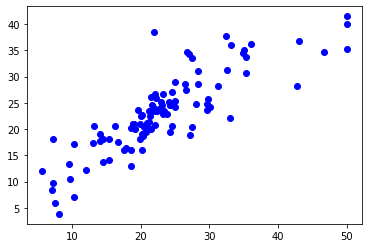

Mean squared error on test data:  23.195599256422906
Mean absolute error on test data:  3.4641858124067197


' End of the Linear Regression approach '

In [0]:

""" 1) Creating the model using Linear Regression Method"""

Regressor = LinearRegression()

#fitting the model
Regressor.fit(X_train,y_train)

#Predicting the model 
y_pred1 = Regressor.predict(X_test)
print("Predicted house prices")
print(y_pred1)

#Plotting the scatter plot for the same model
plt.scatter(y_test,y_pred1,color='blue')
plt.show()

#Predicting the MSE and MAE
mse_lr = mean_squared_error(y_test, y_pred1)
mae_lr = mean_absolute_error(y_test,y_pred1)

#Predicting the accuracy of the model
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

#print(acc)

""" End of the Linear Regression approach """


Mean Squared Error 15.749313725490198
Mean Absolute Error 3.036274509803922


' End of the Decision Tree Regressor approach'

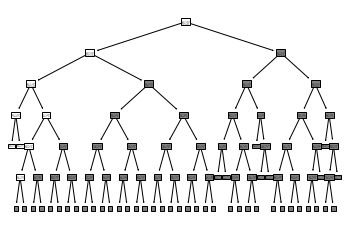

In [0]:

""" 2) using the Decision Tree Approach """

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Fitting  the mode
tree.fit(X_train, y_train)

#Predicting the model
y_pred2 = tree.predict(X_test)

#finding the mse and mae
mse_dt = mean_squared_error(y_test, y_pred2)
mae_dt = mean_absolute_error(y_test,y_pred2)

print("Mean Squared Error",mse_dt)
print("Mean Absolute Error",mae_dt)

#Visualising the results
"""from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())"""
sklearn.tree.plot_tree(tree,max_depth=5)


""" End of the Decision Tree Regressor approach"""


[10:10:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:10:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error 101.61879445165658
Mean Absolute Error 8.469492898267859


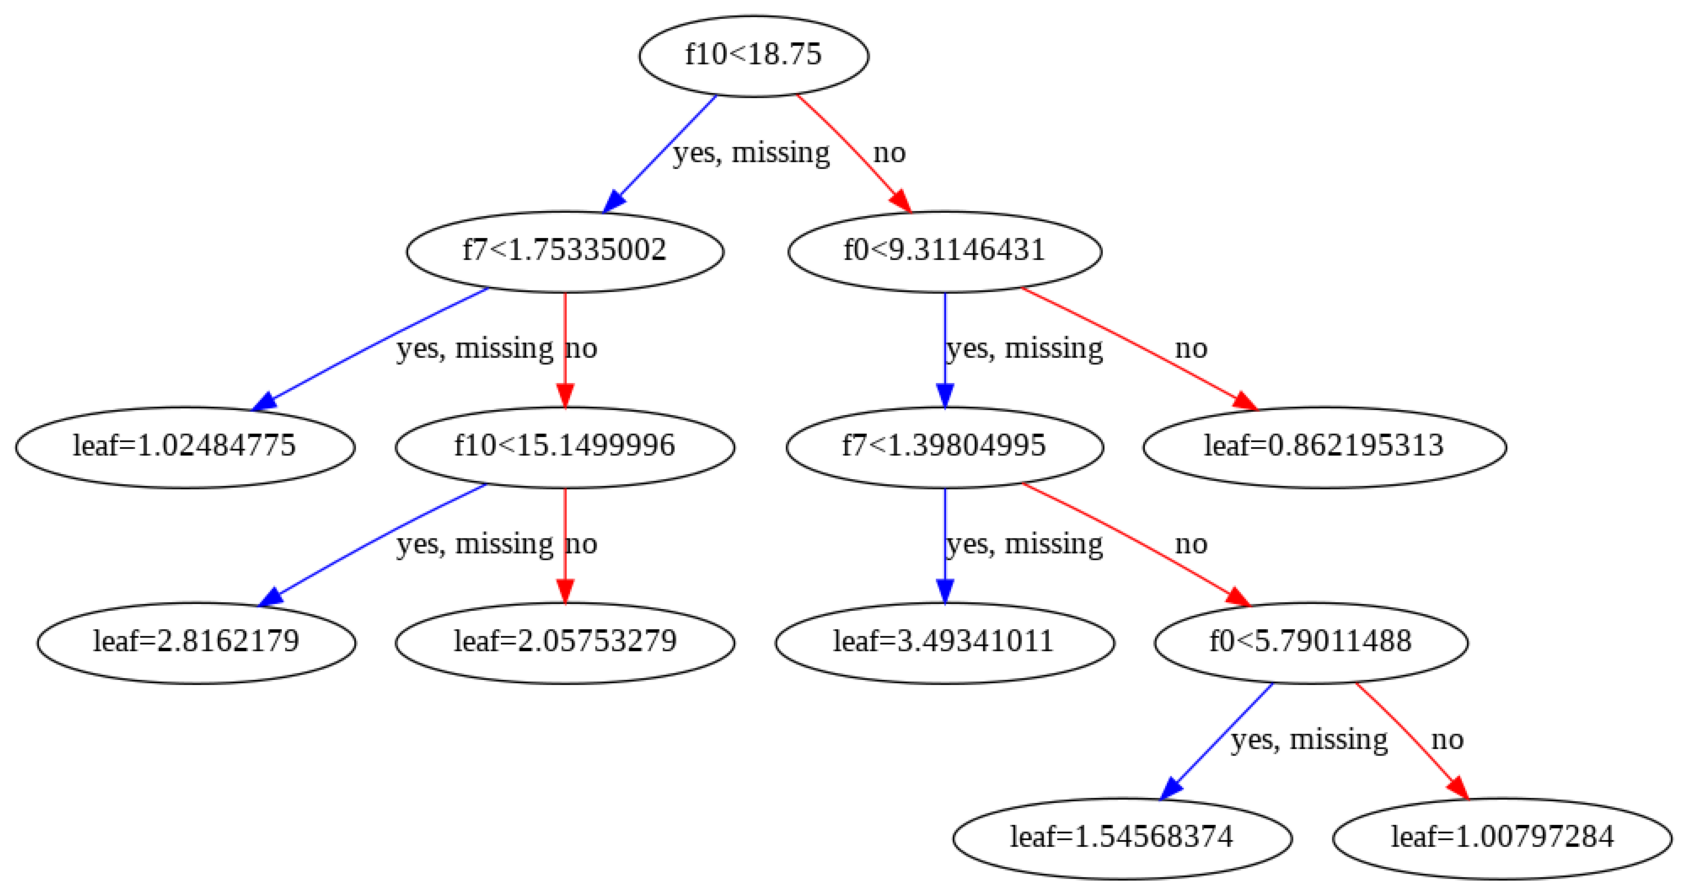

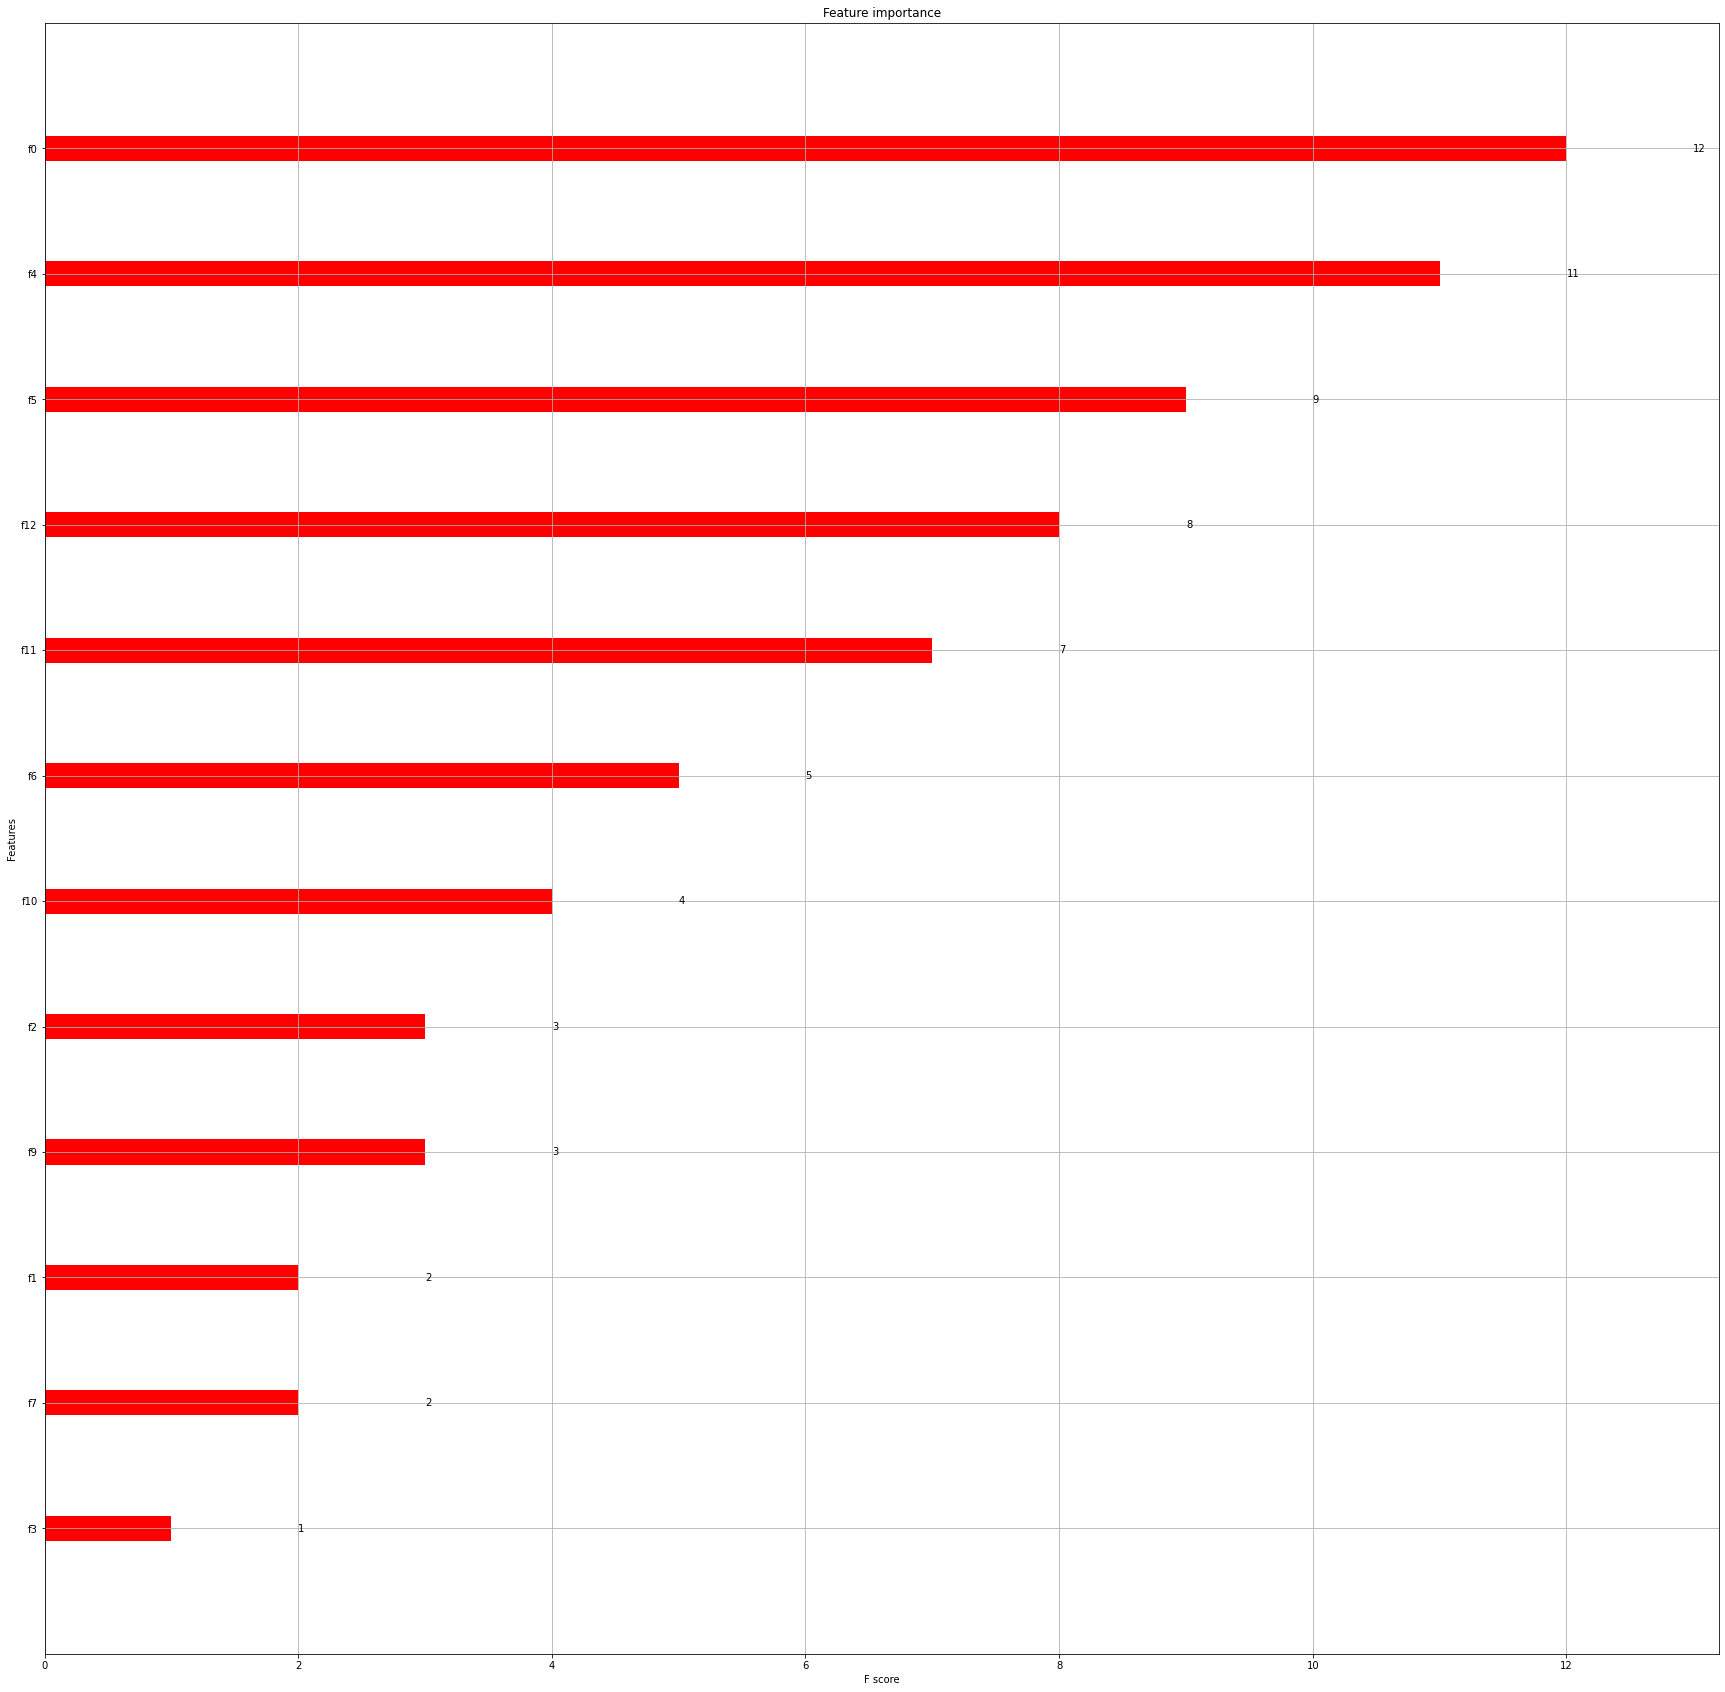

' End of the XG BOOST approach'

In [0]:

""" 3) Using XG Boost Approach for the Boston Housing Dataset"""
#Calling the functions
xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,
                          learning_rate=0.1,max_depth = 5, alpha=5,
                          n_estimators = 10)
#Fitting the model
xg_reg.fit(X_train, y_train)

#Predicting the model 
y_pred3 = xg_reg.predict(X_test)

#Visualise boosting Trees and Feature Importance
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
data_matrix = xgb.DMatrix(data = X_train,label = y_train)
xg_reg = xgb.train(params, dtrain=data_matrix,
                   num_boost_round=10)

#To find the MSE and MAE
mse_xg = mean_squared_error(y_test, y_pred3)
mae_xg = mean_absolute_error(y_test,y_pred3)

#Printing the errors
print("Mean Squared Error",mse_xg)
print("Mean Absolute Error",mae_xg)
#Plotting the second Tree using the matplotlib library
xgb.plot_tree(xg_reg, num_trees=2)
plt.rcParams['figure.figsize']=[30,30]
plt.show()

#Importance of each feature column in the original dataset within the model
xgb.plot_importance(xg_reg,color='red')
plt.rcParams['figure.figsize']=[30,30]
plt.show()

""" End of the XG BOOST approach"""

In [0]:
""" 4) K Fold Cross Validation for the Boston Housing Dataset"""
from sklearn.model_selection  import KFold

#Splitting the model into 10 folds and using the (K-1)th fold to validate the Kth fold
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
data_matrix = xgb.DMatrix(data = X_train,label = y_train)
cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

#Visualising the results 
cv_results.head(10)
print((cv_results["test-rmse-mean"]).tail(10))

""" End of KFold Cross validation Approach"""

40    3.909258
41    3.881533
42    3.865481
43    3.836810
44    3.801771
45    3.765180
46    3.740092
47    3.716822
48    3.699552
49    3.676839
Name: test-rmse-mean, dtype: float64


' End of KFold Cross validation Approach'